In [1]:
pip install "statsmodels==0.13.2"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 19.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 17.5 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 272 kB 46.5 MB/s 
     |████████████████████████████████| 1.1 MB 23.0 MB/s 
     |████████████████████████████████| 57 kB 1.9 MB/s 
     |████████████████████████████████| 140 kB 44.0 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 2.3 MB 37.5 MB/s 
     |████████████████████████████████| 84 kB 747 kB/s 
     |████████████████████████████████| 212 kB 64.1 MB/s 
     |████████████████████████████████| 271 kB 7.1 MB/s 
     |████████████████████████████████| 144 kB 48.2 MB/s 
     |████████████████████████████████| 94 kB 1.7 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 80 kB 7.9 MB/s 
     |████████████████████████████████| 68 kB 

In [3]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 29.4 MB/s 


In [6]:
pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error
#from statsmodels.tsa.seasonal import seasonal_decompose as sm
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go
from sklearn.metrics import r2_score

In [8]:
from datetime import datetime
from dateutil import parser
import statsmodels
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose


In [10]:
import gradio as gr

In [11]:
from matplotlib import dates
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import plotly.graph_objects as graph_objects

import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [13]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [14]:
df = pd.read_excel("data.xlsx", index_col=0, header=0)

In [15]:
df

,Data,Qt_almoco,Qt_jantar
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218
...,...,...,...
1092,2020-03-25,0,0
1093,2020-03-26,11,13
1094,2020-03-27,15,14
1095,2020-03-30,13,12


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 0 to 1096
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Data       1097 non-null   object
 1   Qt_almoco  1097 non-null   int64 
 2   Qt_jantar  1097 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 34.3+ KB


In [17]:
df.Data = pd.to_datetime(df.Data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 0 to 1096
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       1097 non-null   datetime64[ns]
 1   Qt_almoco  1097 non-null   int64         
 2   Qt_jantar  1097 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 34.3 KB


In [18]:
df.set_index("Data", inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1097 entries, 2016-01-04 to 2020-03-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Qt_almoco  1097 non-null   int64
 1   Qt_jantar  1097 non-null   int64
dtypes: int64(2)
memory usage: 25.7 KB


# Exploração

## Visualizações

**<h2>Inicialmente, avaliou-se de modo geral o dataset de pratos servidos ao longo do anos no Restaurante Universitário da UFC - Campus de Sobral.<h2>**
<h2>Isto foi feito por meio da plotagem de um gráfico com o eixo x sendo os meses dos respectivos anos, e o eixo y sendo o número total de refeições servidas naquele período temporal específico (seja de almoço ou de janta, representados respectivamente pela linha de cor laranja e pela cor azul).<h2>

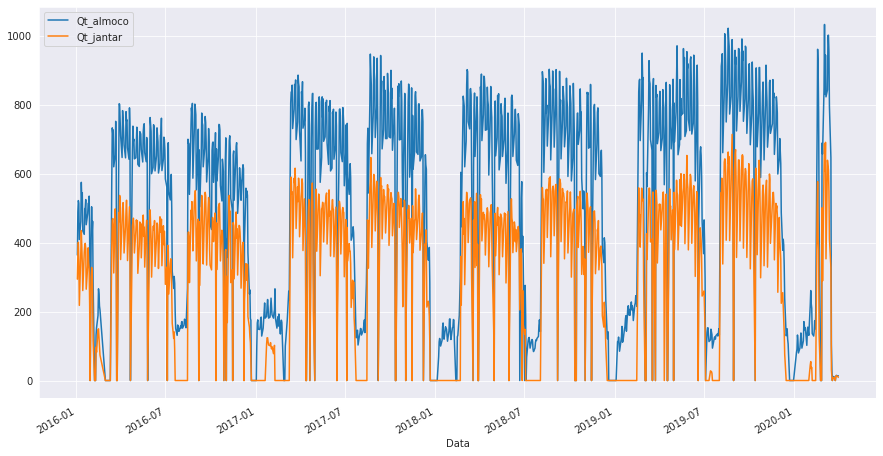

In [20]:
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
sns.mpl.rc("figure", figsize=(15,8))
df.plot()
plt.grid(True)

<h2>Então, com ciência da noção geral conceitual básica do dataset em questão, fez-se uma análise em separado da quantidade de pratos de almoço e de jantar serivos ao longo do período (de 2016 a 2020) por meio da plotagem de dois gráficos, um para cada caso.<h2>

<h3>Imediatamente abaixo tem-se o gráfico referente ao almoço (2016-2020).</h3>

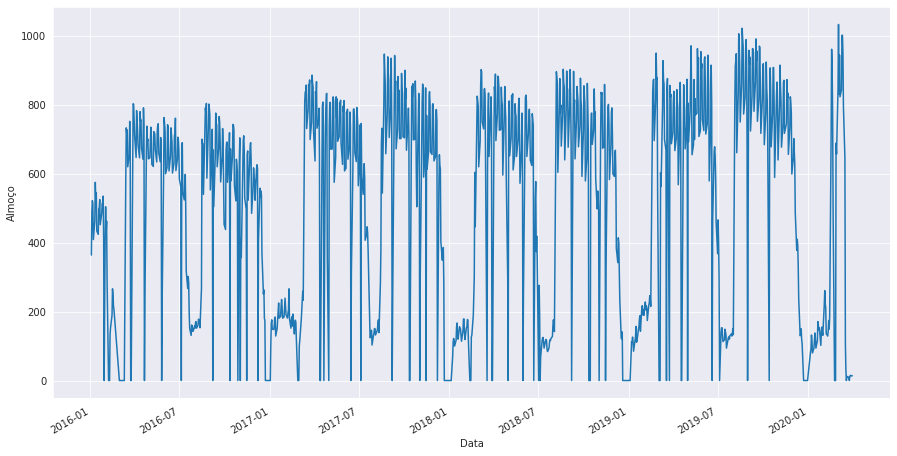

In [21]:
df.Qt_almoco.plot(figsize=(15,8), y = 'Qt_almoco')
plt.ylabel("Almoço")
plt.grid(True)
plt.show()

<h3>E logo abaixo tem-se o gráfico referente ao jantar (2016-2020).</h3>

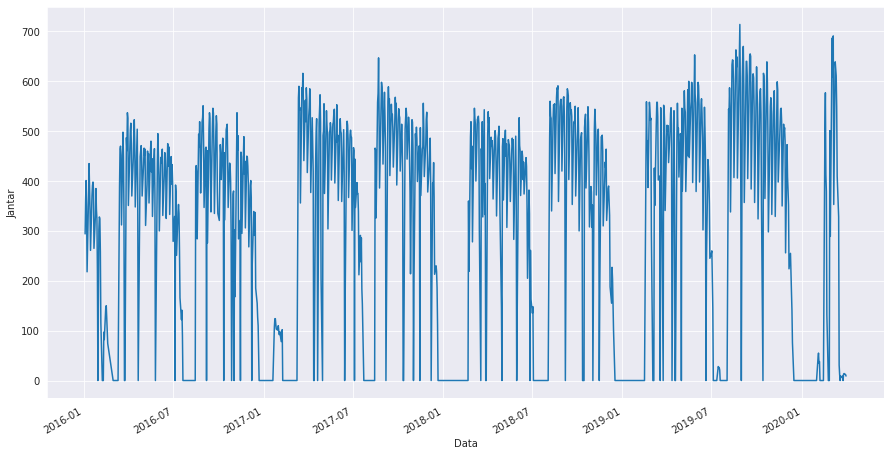

In [22]:
df.Qt_jantar.plot()
plt.ylabel("Jantar")
plt.grid(True)

<h2>Agora, sob uma ótica mais específica, são visualmente descritas abaixo em oito gráficos diferentes (todos do mesmo tipo) a disposição temporal dos números de pratos de almoço e de jantar servidos em cada ano com registros completos (isto é, 2016, 2017, 2018 e 2019, pois 2020 tem dados incompletos).</h2>

<h3>Gráfico interativo do Plotly dos dados de almoço em 2016.

In [23]:
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df[df.index.year==2016].index, y=df[df.index.year==2016]["Qt_almoco"],
                           mode='lines',name="Almoço 2016"))
fig_2.update_layout(
    xaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    yaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    showlegend=True,
    xaxis_title = "Data",
    yaxis_title="Almoço 2016",
    title = "Plotly"
)

<h3>Gráfico interativo do Plotly dos dados de jantar em 2016.

In [24]:
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df[df.index.year==2016].index, y=df[df.index.year==2016]["Qt_jantar"],
                           mode='lines',name="Jantar 2016"))
fig_2.update_layout(
    xaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    yaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    showlegend=True,
    xaxis_title = "Data",
    yaxis_title="Jantar 2016",
    title = "Plotly"
)

<h3>Gráfico interativo do Plotly dos dados de almoço em 2017.

In [25]:
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df[df.index.year==2017].index, y=df[df.index.year==2017]["Qt_almoco"],
                           mode='lines',name="Almoço 2017"))
fig_2.update_layout(
    xaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    yaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    showlegend=True,
    xaxis_title = "Data",
    yaxis_title="Almoço 2017",
    title = "Plotly"
)

<h3>Gráfico interativo do Plotly dos dados de jantar em 2017.

In [26]:
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df[df.index.year==2017].index, y=df[df.index.year==2017]["Qt_jantar"],
                           mode='lines',name="Jantar 2017"))
fig_2.update_layout(
    xaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    yaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    showlegend=True,
    xaxis_title = "Data",
    yaxis_title="Jantar 2017",
    title = "Plotly"
)

<h3>Gráfico interativo do Plotly dos dados de almoço em 2018.

In [27]:
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df[df.index.year==2018].index, y=df[df.index.year==2018]["Qt_almoco"],
                           mode='lines',name="Almoço 2018"))
fig_2.update_layout(
    xaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    yaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    showlegend=True,
    xaxis_title = "Data",
    yaxis_title="Almoço 2018",
    title = "Plotly"
)

<h3>Gráfico interativo do Plotly dos dados de jantar em 2018.

In [28]:
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df[df.index.year==2018].index, y=df[df.index.year==2018]["Qt_jantar"],
                           mode='lines',name="Jantar 2018"))
fig_2.update_layout(
    xaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    yaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    showlegend=True,
    xaxis_title = "Data",
    yaxis_title="Jantar 2018",
    title = "Plotly"
)

<h3>Gráfico interativo do Plotly dos dados de almoço em 2019.

In [29]:
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df[df.index.year==2019].index, y=df[df.index.year==2019]["Qt_almoco"],
                           mode='lines',name="Almoço 2019"))
fig_2.update_layout(
    xaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    yaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    showlegend=True,
    xaxis_title = "Data",
    yaxis_title="Almoço 2019",
    title = "Plotly"
)

<h3>Gráfico interativo do Plotly dos dados de jantar em 2019.

In [30]:
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df[df.index.year==2019].index, y=df[df.index.year==2019]["Qt_jantar"],
                           mode='lines',name="Jantar 2019"))
fig_2.update_layout(
    xaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    yaxis = dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    showlegend=True,
    xaxis_title = "Data",
    yaxis_title="Jantar 2019",
    title = "Plotly"
)

<h2>Logo após, adota-se uma perspectiva mais discretizada que a anterior: o histograma, que permite verificar a centralidade, a amplitude e a simetria na distribuição das amostras.</h2>

<h2>Fez-se tal escolha a fim de aferir a frequência com que cada quantidade de refeições na casa das centenas¹ foi servida, em números absolutos de vezes².</h2>

--------------------------------------------------
<h3>Notas de rodapé:</h3>

<h3>¹: Variando de 200 em 200, começando de zero e indo até 1000.</h3>

<h3>²: Que variam de zero até pouco mais de 200 ocorrências.</h3>

<h3>Abaixo, tem-se um histograma multimodal (ou seja, com o aparecimento de vários picos) na verificação de quantidade servida de refeições de almoço.</h3>

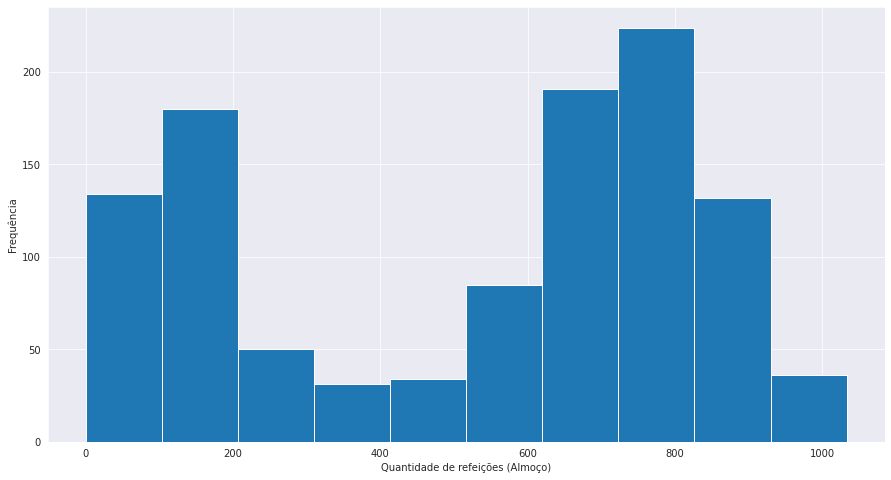

In [31]:
df["Qt_almoco"].plot(kind = 'hist',align='mid')
plt.ylabel("Frequência")
plt.xlabel("Quantidade de refeições (Almoço)")
plt.show()

<h3>Por outro lado, a seguir tem-se um histograma mais ou menos distorcido à esquerda (isto é, com a ocorrência de altos valores com frequência não tão alta assim) na verificação de quantidade servida de refeições de jantar.</h3>

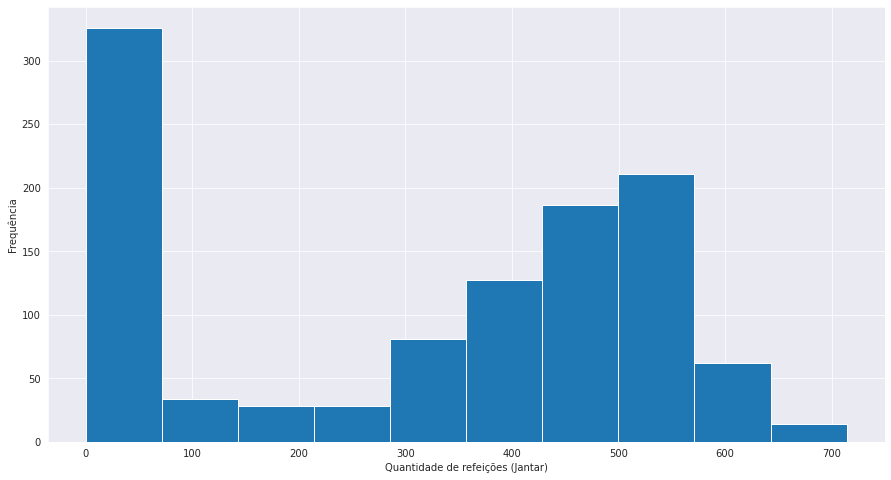

In [32]:
df["Qt_jantar"].plot(kind = 'hist')
plt.ylabel("Frequência")
plt.xlabel("Quantidade de refeições (Jantar)")
plt.show()

<h2>Ademais, ao calcular o somatório do número de refeições servidas a cada 12 meses¹, tem-se o gráfico de linha abaixo que mostrou forte queda em 2019 no almoço após 2 anos com tendência de crescimento (2016-2018).</h2>
--------------------------------------------------
<h3>Notas de rodapé:</h3>

<h3>¹: Ou seja, praticamente a cada dois semestres letivos da UFC.</h3>

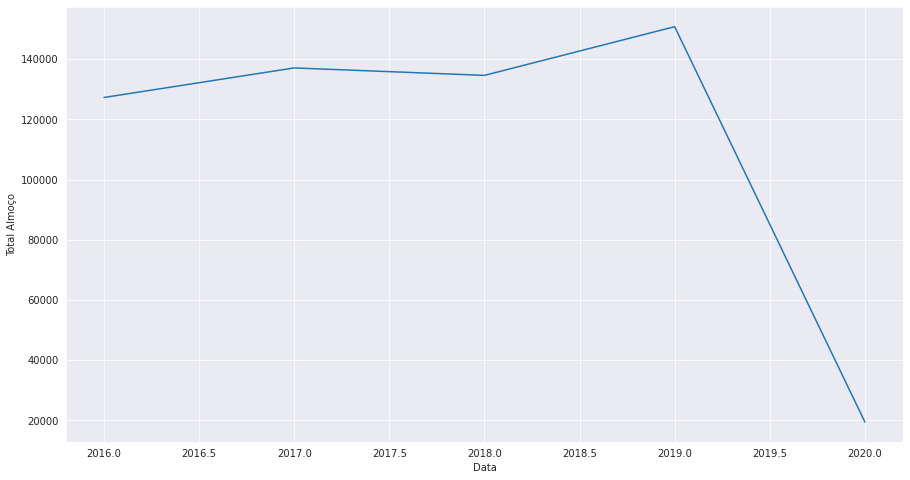

In [33]:
df.Qt_almoco.groupby(df.index.year).sum().plot()
plt.ylabel("Total Almoço")
plt.grid(True)

<h2>Ao passo que no cálculo do somatório do número de refeições servidas a cada 12 meses¹, tem-se o gráfico de linha abaixo que mostrou também intensa queda em 2019 no jantar após 2 anos com tendência de crescimento (2016-2018).</h2>
--------------------------------------------------
<h3>Notas de rodapé:</h3>

<h3>¹: Ou seja, praticamente a cada dois semestres letivos da UFC.</h3>

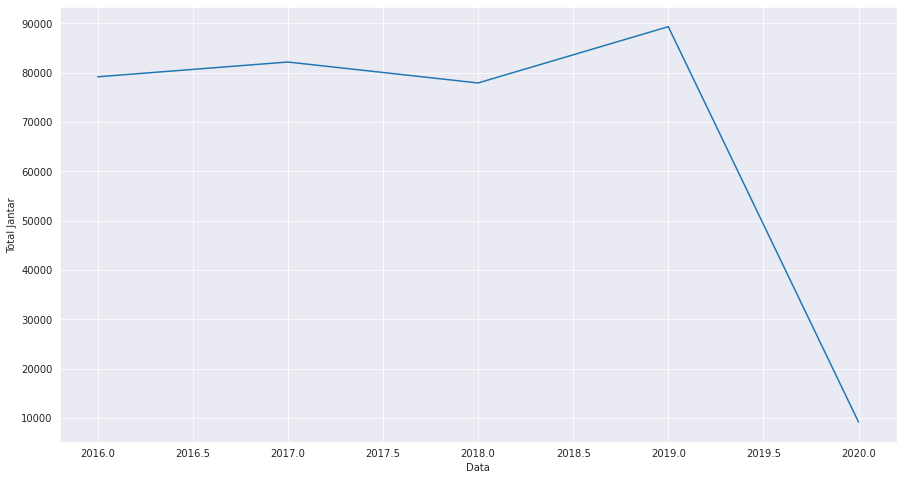

In [34]:
df.Qt_jantar.groupby(df.index.year).sum().plot()
plt.ylabel("Total Jantar")
plt.grid(True)

<h2>Por último, com a finalidade de comparar as médias de refeições servidas por ano¹ entre almoço² e jantar³, foi obtido o gráfico de linhas que pode ser visto logo abaixo.</h2>

--------------------------------------------------
<h3>Notas de rodapé:</h3>

<h3>¹: No período que compreende o ano de 2016 até o começo de 2020.</h3>

<h3>²: "Qt_almoco" é representado pela linha azul.</h3>

<h3>³: "Qt_jantar" é representado pela linha laranja.</h3>

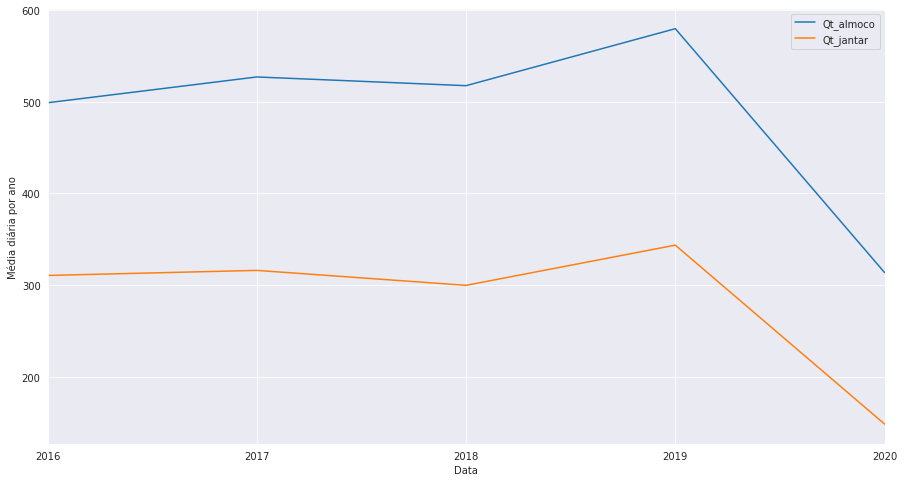

In [35]:
 df.resample(rule='A').mean().plot()
 plt.ylabel("Média diária por ano")
 plt.show()

## Médias mensais

<h2>Nesse ínterim, fez-se uma análise mais granular da quantidade de refeições servidas, desta vez, mensalmente¹ onde em cada um destes intervalos cronológicos calculou-se a média mensal de pratos servidos².</h2>
--------------------------------------------------
<h3>Notas de rodapé:</h3>

<h3>¹: Dentro de um mesmo ano em específico.</h3>

<h3>²: Sejam tais pratos referentes à refeições de almoço ou de jantar.</h3>

<h3>Gráfico das médias mensais de dados de almoço em 2016.</h3>

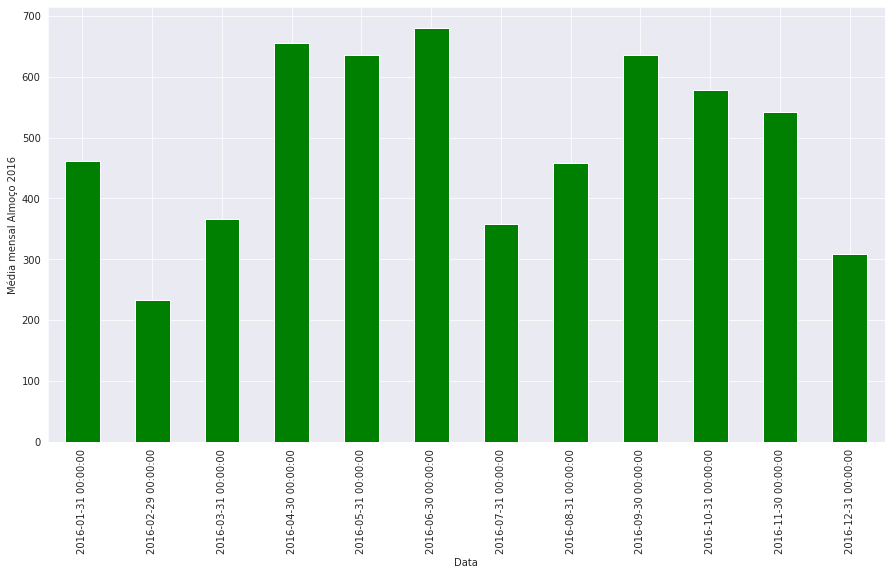

In [36]:
df[df.index.year==2016]["Qt_almoco"].resample("M").mean().plot.bar(color="green")
plt.ylabel("Média mensal Almoço 2016")
plt.grid(True)

<h3>Gráfico das médias mensais de dados de jantar em 2016.</h3>

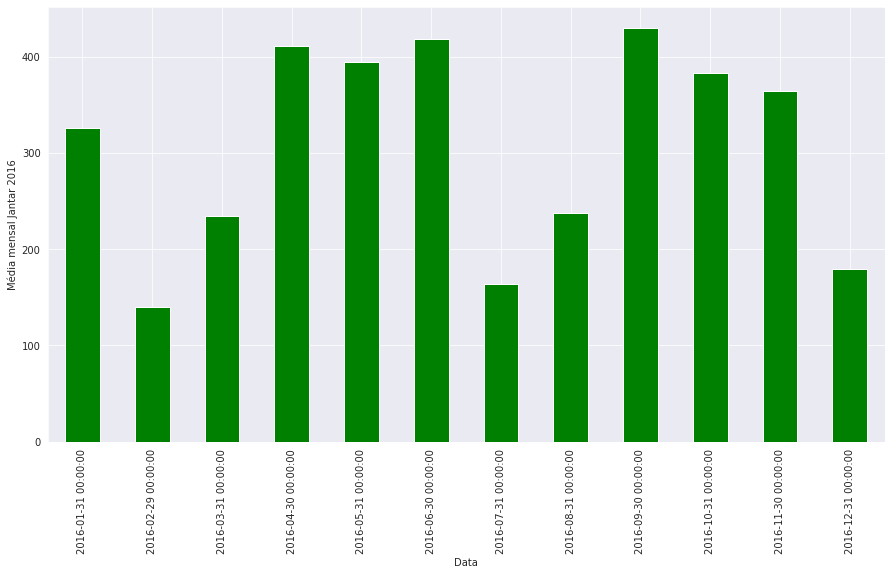

In [37]:
df[df.index.year==2016]["Qt_jantar"].resample("M").mean().plot.bar(color="green")
plt.ylabel("Média mensal Jantar 2016")
plt.grid(True)

<h3>Gráfico das médias mensais de dados de almoço em 2017.</h3>

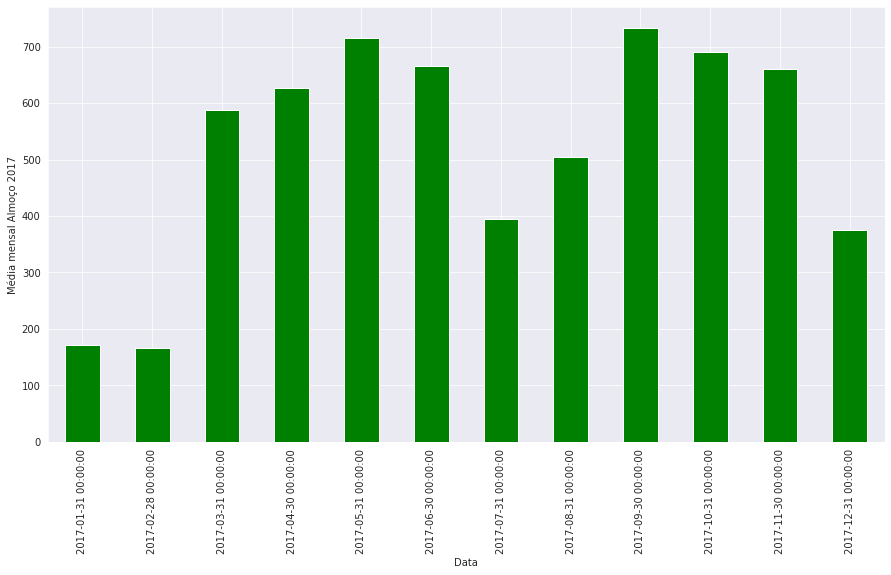

In [38]:
df[df.index.year==2017]["Qt_almoco"].resample("M").mean().plot.bar(color="green")
plt.ylabel("Média mensal Almoço 2017")
plt.grid(True)

<h3>Gráfico das médias mensais de dados de jantar em 2017.</h3>

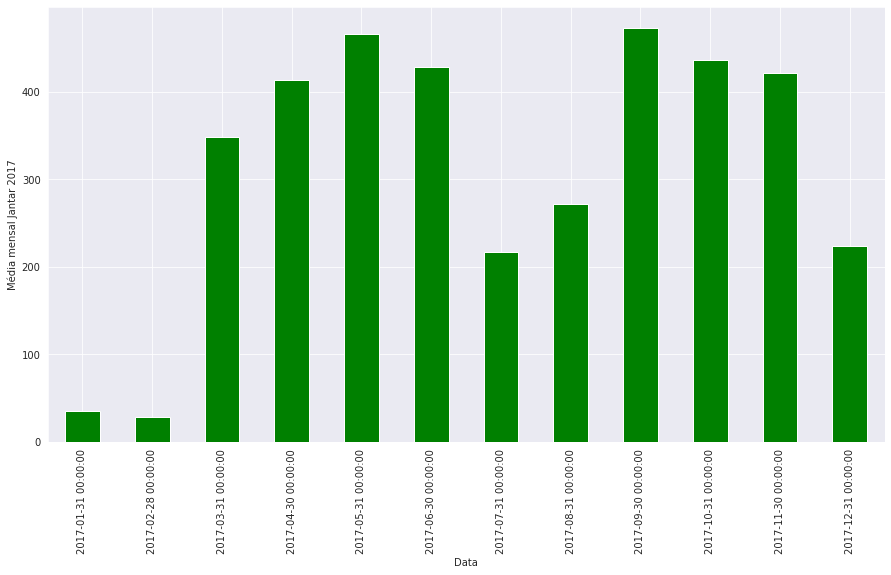

In [39]:
df[df.index.year==2017]["Qt_jantar"].resample("M").mean().plot.bar(color="green")
plt.ylabel("Média mensal Jantar 2017")
plt.grid(True)

<h3>Gráfico das médias mensais de dados de almoço em 2018.</h3>

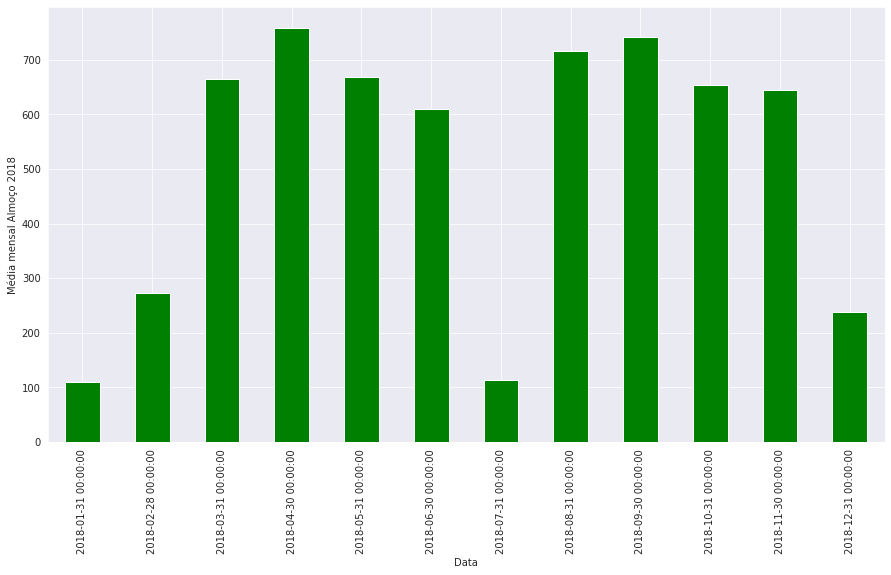

In [40]:
df[df.index.year==2018]["Qt_almoco"].resample("M").mean().plot.bar(color="green")
plt.ylabel("Média mensal Almoço 2018")
plt.grid(True)

<h3>Gráfico das médias mensais de dados de jantar em 2018.</h3>

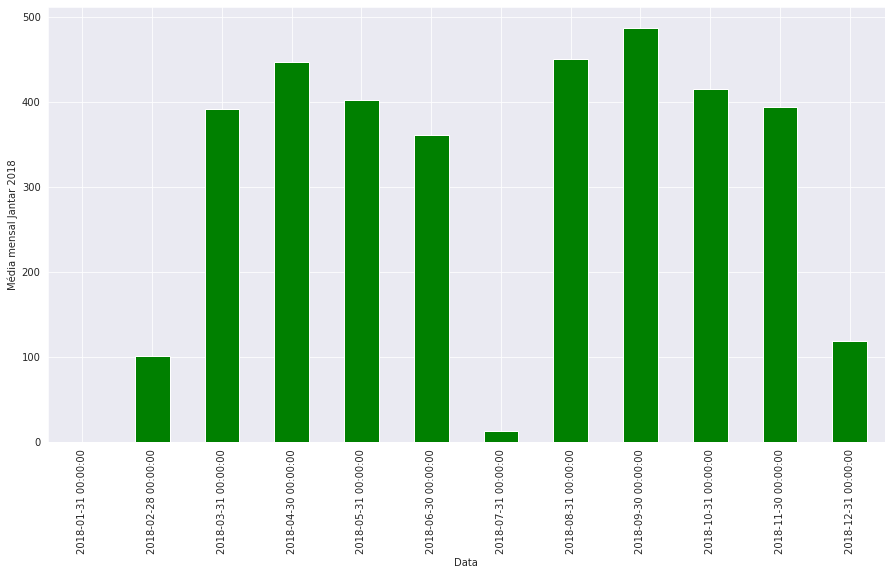

In [41]:
df[df.index.year==2018]["Qt_jantar"].resample("M").mean().plot.bar(color="green")
plt.ylabel("Média mensal Jantar 2018")
plt.grid(True)

<h3>Gráfico das médias mensais de dados de almoço em 2019.</h3>

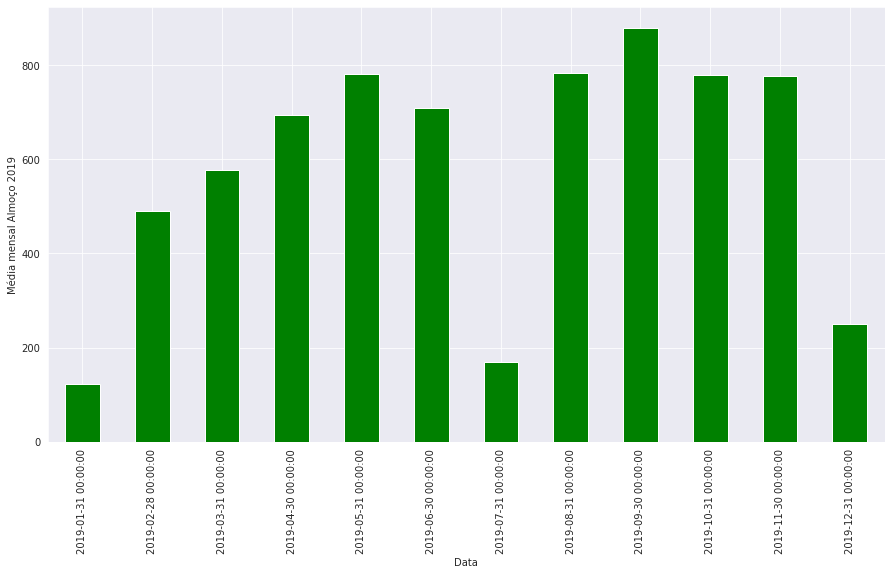

In [42]:
df[df.index.year==2019]["Qt_almoco"].resample("M").mean().plot.bar(color="green")
plt.ylabel("Média mensal Almoço 2019")
plt.grid(True)

<h3>Gráfico das médias mensais de dados de jantar em 2019.</h3>

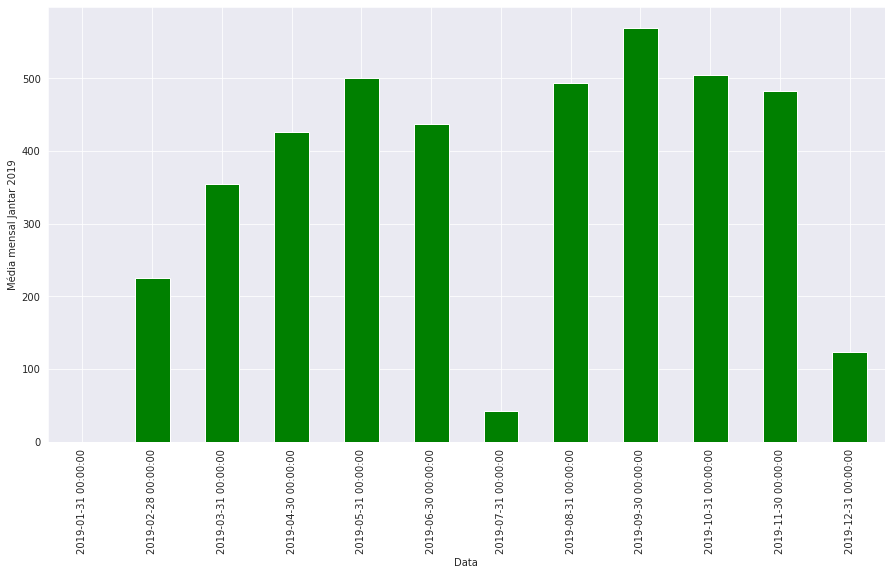

In [43]:
df[df.index.year==2019]["Qt_jantar"].resample("M").mean().plot.bar(color="green")
plt.ylabel("Média mensal Jantar 2019")
plt.grid(True)

## Decomposição

Criando um dataset por meio do preenchimento do original (Inclusão de dias antes não inclusos)

In [44]:
new = df.asfreq('d')
new = new.fillna(0)

In [45]:
new.isnull().values.any()

False

<h2>A princípio, os dados das refeições foram decompostos no gráfico abaixo visto, que permite enxergar fatores como sazonalidade, tendência de crescimento ou decrescimento e taxa de resíduos (resid) ao longo do ano de 2016.</h2>
<h2>Abaixo usou-se a decomposição STL no dataset original.</h2>

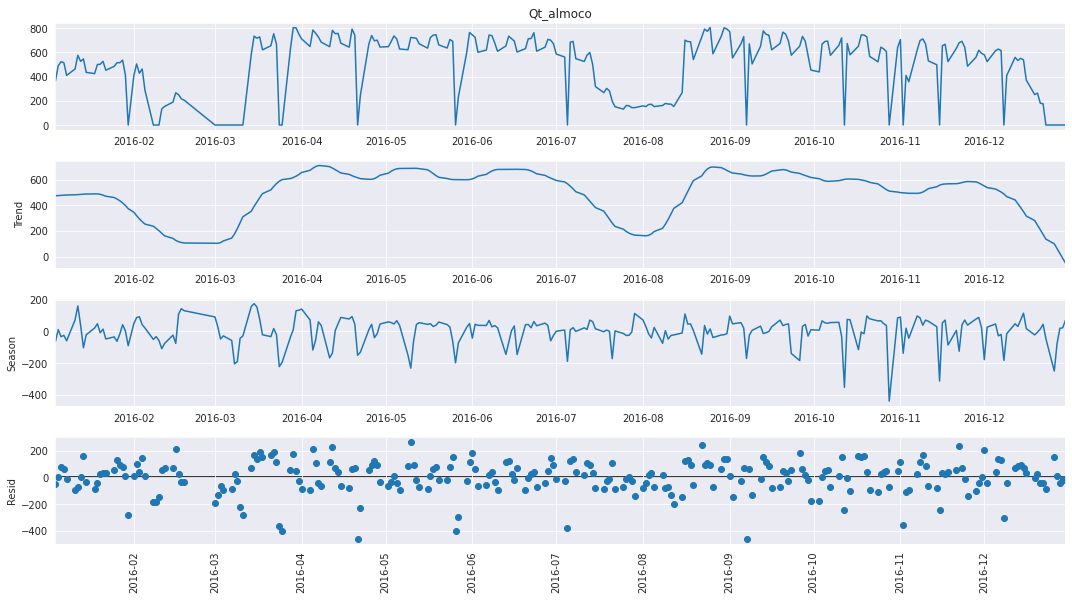

In [46]:
res = STL(df[df.index.year==2016].Qt_almoco,period=12).fit()
res.plot()
plt.xticks(rotation=90)
plt.show()


<h2>Por sua vez, abaixo tem-se uma decomposição do dataset do RU de forma aditiva e sazonal, onde verifica-se que a sazonalidade está mais discretizada do que contínua (como estava no gráfico acima).</h2>

<h2>Já aqui utilizou-se a seasonal decompose no dataset modificado (preenchendo os dias faltantes).</h2>

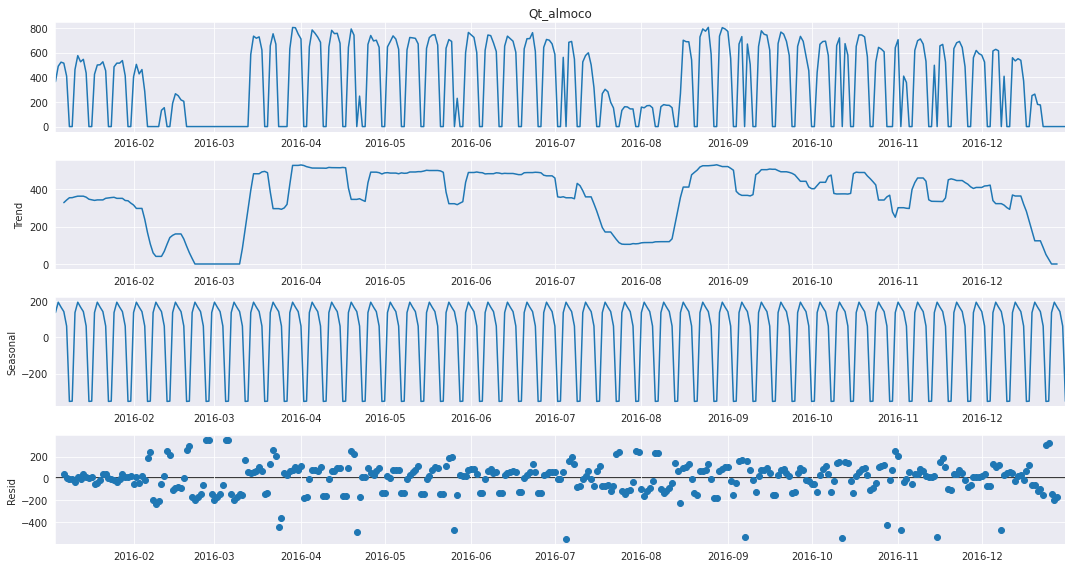

In [47]:
decompose_data = seasonal_decompose(new[new.index.year==2016]["Qt_almoco"], model="additive")
decompose_data.plot();

## Autocorrelação

<h3>Além disso, nos três gráficos seguintes, aplicou-se escrutínio em relação a correlação cruzada (autocorrelação) sobre as quantias registradas de pratos de almoço servidos ao longo do ano de 2016.</h3>
<h3>Desse modo, verificou-se um considerável nível de aproximação à correlação perfeita (isto é, mais próximo de 1 do que de 0) na metade que começa na esquerda em direção à direita dos gráficos.</h3>
<h2>Visou-se averiguar o quanto os dias anteriores influenciavam nas predições dos dias seguintes.</h2>

The Autocorrelation plot for the data is:


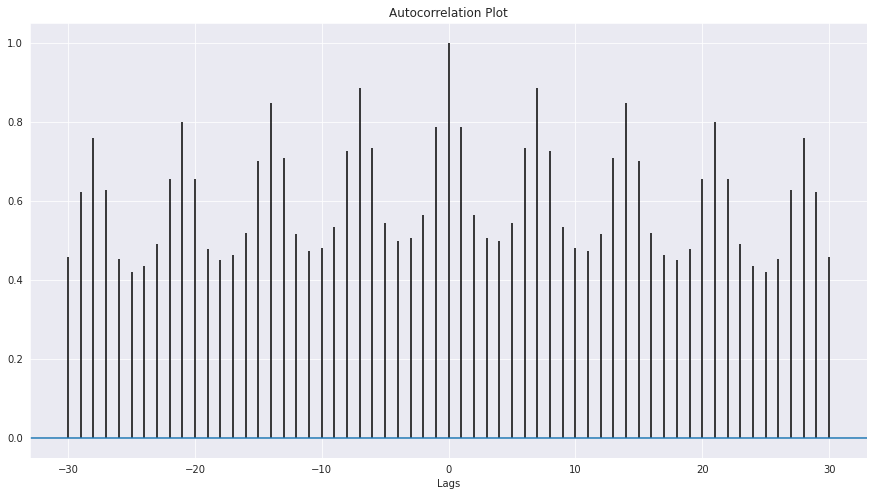

In [48]:
plt.title("Autocorrelation Plot")
plt.xlabel("Lags")
plt.acorr(new[new.index.year==2016]["Qt_almoco"], maxlags = 30)
print("The Autocorrelation plot for the data is:")
plt.grid(True)
plt.show()

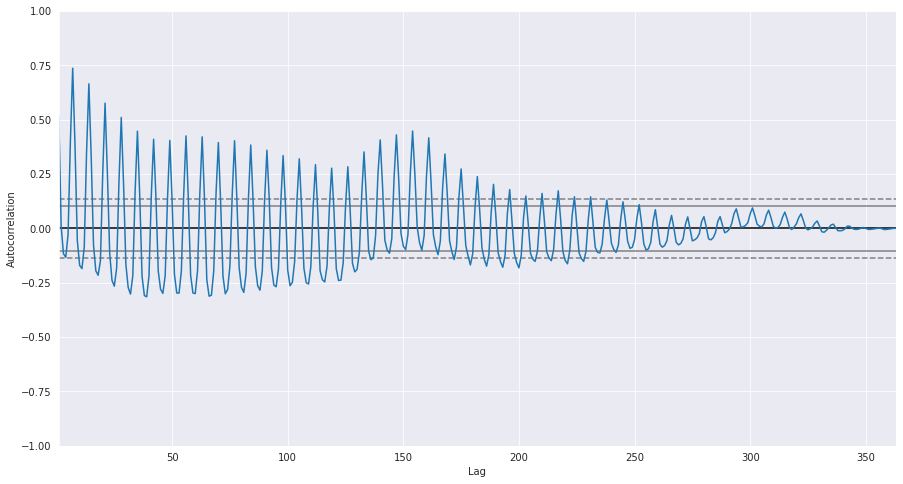

In [49]:
# Creating Autocorrelation plot
x = pd.plotting.autocorrelation_plot(new[new.index.year==2016]["Qt_almoco"])
 
# plotting the Curve
x.plot()
plt.grid(True)
# Display
plt.show()

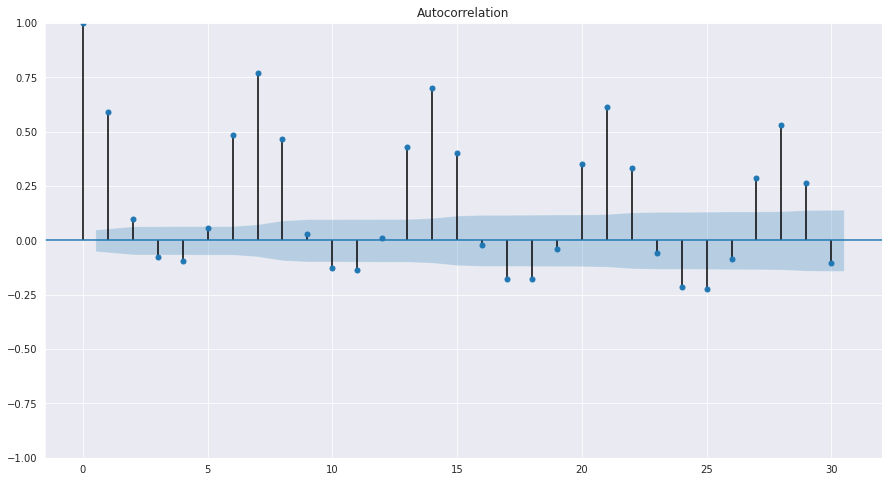

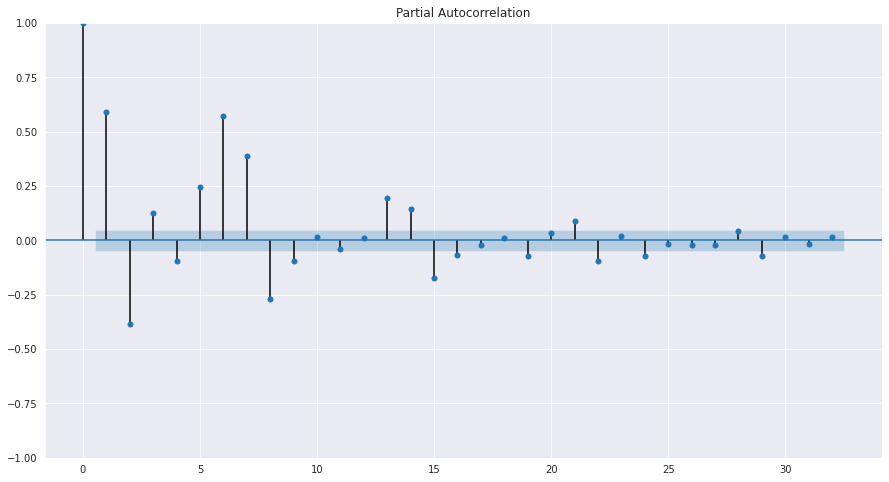

In [50]:
    plot_acf(new["Qt_almoco"],lags=30)
    plt.show()
    plot_pacf(new["Qt_almoco"])
    plt.show()

# Hipóteses pós-observação

<h2>Por conseguinte, após esta extensa etapa de exploração do dataset acima exposta, foi possível formular algumas hipóteses cuja validade será verificada por meio da análise das predições a serem geradas em seguida.</h2>

- Observações:
1.   No período de 01/03 até 11/03 ninguém almoçou nem jantou no RU, por motivos desconhecidos.
2.   No começo do mês sempre menos pessoas frequentam o RU, às vezes até ninguém.
3. Durante as férias o RU funciona por apenas um período.
4. Da metade para o final do mês ocorre um crescimento de pessoas frequentando o RU.
5. Geralmente, o almoço é mais frequentado pelas pessoas do que a janta.

<h2>Dado que o problema-chave deste trabalho reside na quantidade de alimento preparada ao longo de um dado dia, tentando equilibrar a prevenção ao desperdício de alimentos com evitar de deixar a comunidade acadêmica esperando muito tempo nas filas, pensou-se em:

- Hipóteses:
1.   Supostamente ocorre maior demanda de preparação de mais alimentos pela manhã do que de noite (por causa da quantidade de cursos na Universidade).
2.   Ao témino de semestre letivo, há uma queda drástica de pessoas indo ao RU, logo uma menor demanda de alimentos é requerida. Nestes períodos, pode-se experimentar preparar menos alimentos propositalmente para ver se o desperdício diminui.
3. A pandemia de COVID-19 afetou severamente de modo negativo a quantidade de pessoas que vão ao RU.
4. A quantidade média de pratos servidos é muito baixa, considerando a quantidade de cursos oferecidos e isso pode ocorrer pelas altas taxas de evasão de muitos alunos.







# Modelagem

Separação dos dados em treino e teste: 2019 será usado para teste e os anos anteriores para treino

In [51]:
#dataset original
alm_train = df[df.index.year<2019]["Qt_almoco"]
alm_test = df[df.index.year==2019]["Qt_almoco"]
jan_train = df[df.index.year<2019]["Qt_jantar"]
jan_test = df[df.index.year==2019]["Qt_jantar"]

In [52]:
#dataset modificado
al_train = new[new.index.year<2019]["Qt_almoco"]
al_test = new[new.index.year==2019]["Qt_almoco"]
ja_train = new[new.index.year<2019]["Qt_jantar"]
ja_test = new[new.index.year==2019]["Qt_jantar"]

### AutoReg

<h2>Aqui foi utilizado o dataset modificado pois ele obteve melhores resultados nas predições para o modelo de AutoReg.</h2>

Almoço 2019

In [53]:
model = AutoReg(al_train, lags=365)
model_fit = model.fit()
# make prediction
predA = model_fit.predict(len(al_train),len(al_test)+len(al_train)-1,dynamic=False)
predA[predA<0]=0

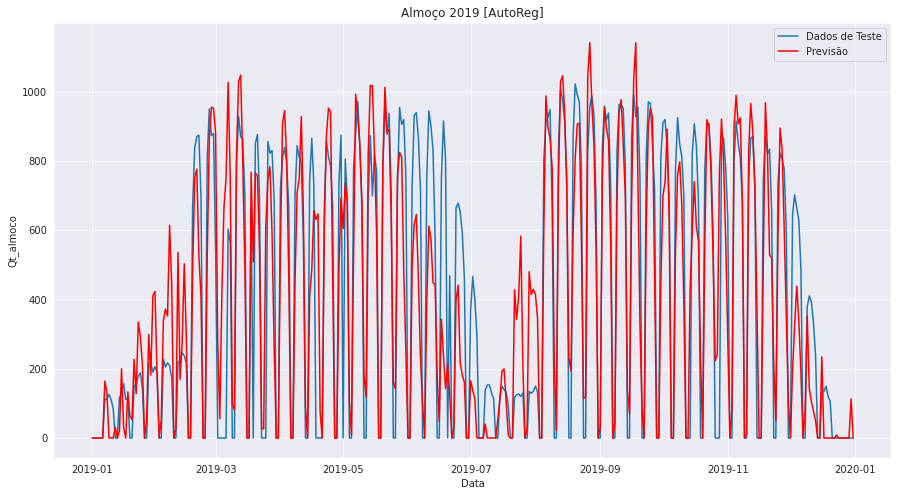

In [54]:
plt.title("Almoço 2019 [AutoReg]")
plt.xlabel("Data")
plt.ylabel("Qt_almoco")
plt.plot(al_test.index, al_test, label="Dados de Teste")
plt.plot(al_test.index,predA, color='red', label="Previsão")
plt.legend()
plt.show()

In [55]:
r2_score(al_test,predA)

0.7260326910378065

Jantar 2019

In [56]:
model = AutoReg(ja_train, lags=365)
model_fit = model.fit()
# make prediction
predJ = model_fit.predict(len(ja_train),len(ja_test)+len(ja_train)-1,dynamic=False)
predJ[predJ<0]=0

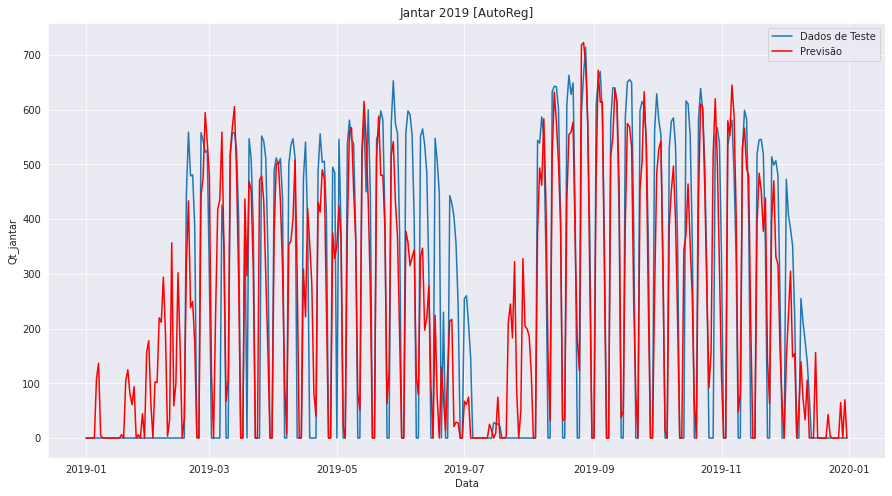

In [57]:
plt.title("Jantar 2019 [AutoReg]")
plt.xlabel("Data")
plt.ylabel("Qt_jantar")
plt.plot(ja_test.index, ja_test, label="Dados de Teste")
plt.plot(ja_test.index,predJ, color='red', label="Previsão")
plt.legend()
plt.show()

In [58]:
r2_score(ja_test,predJ)

0.7264856877990086

###Gradio

<h2>Para a construção do dataapp Gradio foram utilizados os dados de predição gerados pelo modelo de AutoReg, pois este gerou os melhores resultados dentre os três modelos testados.</h2>

In [65]:
df_predictions = pd.DataFrame(index=al_test.index,columns=df.columns)
df_predictions.head()

,Qt_almoco,Qt_jantar
Data,,
2019-01-01,NaN,NaN
2019-01-02,NaN,NaN
2019-01-03,NaN,NaN
2019-01-04,NaN,NaN
2019-01-05,NaN,NaN


In [66]:
df_predictions['Qt_almoco'] = predA

In [67]:
df_predictions['Qt_jantar'] = predJ

In [68]:
#create a function for gradio
def previsao(Dia, Mês, Tipo):
    if(int(Tipo) == 1):
      pre = '2019' + '-' + str(int(Mês)) + '-' + str(int(Dia)) 
      prediction = df_predictions.loc[pre].Qt_almoco  
    elif(int(Tipo) == 2):
      pre = '2019' + '-' + str(int(Mês)) + '-' + str(int(Dia)) 
      prediction = df_predictions.loc[pre].Qt_jantar
    else:
      return 'Tipo de refeição inválido, digite 1 ou 2.'
    return int(prediction)

In [69]:
from numbers import Number
outputs = gr.outputs.Textbox(label='Previsão do Total de refeições:')
app = gr.Interface(fn=previsao, inputs=['number', 'number', 'number'], outputs=outputs,description="Previsão de consumo no RU em 2019.")
app.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://10554.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f352857ae50>,
 'http://127.0.0.1:7860/',
 'https://10554.gradio.app')

### ARIMA

<h2>No ARIMA foi utilizado o dataset original (com dias faltantes).</h2>

Almoço 2019

In [70]:
history = [x for x in alm_train]
predictions = list()
for i in range(len(alm_test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast(typ='levels')
  pred = output[0]
  predictions.append(pred)
  true = alm_test[i]
  history.append(true)
  print('predicted=%f, expected=%f' % (pred, true))
predictions = [max(0,d)  for d in predictions] 

predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=113.000000
predicted=75.885775, expected=111.000000
predicted=65.525687, expected=126.000000
predicted=92.122091, expected=111.000000
predicted=86.943547, expected=85.000000
predicted=97.940960, expected=117.000000
predicted=117.917823, expected=127.000000
predicted=120.858978, expected=157.000000
predicted=139.786180, expected=111.000000
predicted=104.180105, expected=114.000000
predicted=122.328156, expected=149.000000
predicted=142.358832, expected=156.000000
predicted=148.641702, expected=179.000000
predicted=158.007706, expected=188.000000
predicted=166.628460, expected=143.000000
predicted=147.159330, expected=215.000000
predicted=202.708590, expected=217.000000
predicted=197.336880, expected=190.000000
predicted=188.549415, expected=206.000000
predicted=195.598801, expected=189.000000
predicted=195.

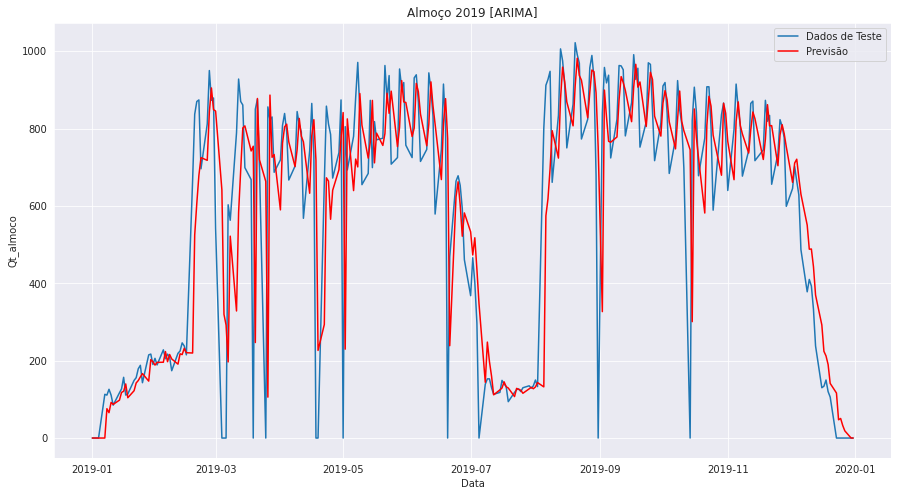

In [71]:
plt.title("Almoço 2019 [ARIMA]")
plt.xlabel("Data")
plt.ylabel("Qt_almoco")
plt.plot(alm_test.index, alm_test,label="Dados de Teste")
plt.plot(alm_test.index,predictions, color='red', label="Previsão")
plt.legend()
plt.show()

In [72]:
r2_score(alm_test,predictions)

0.6554169632817233

Jantar 2019

In [73]:
history = [x for x in jan_train]
predictions = list()
for i in range(len(jan_test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast(typ='levels')
  pred = output[0]
  predictions.append(pred)
  true = jan_test[i]
  history.append(true)
  print('predicted=%f, expected=%f' % (pred, true))
predictions = [max(0,d)  for d in predictions] 

predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.00000

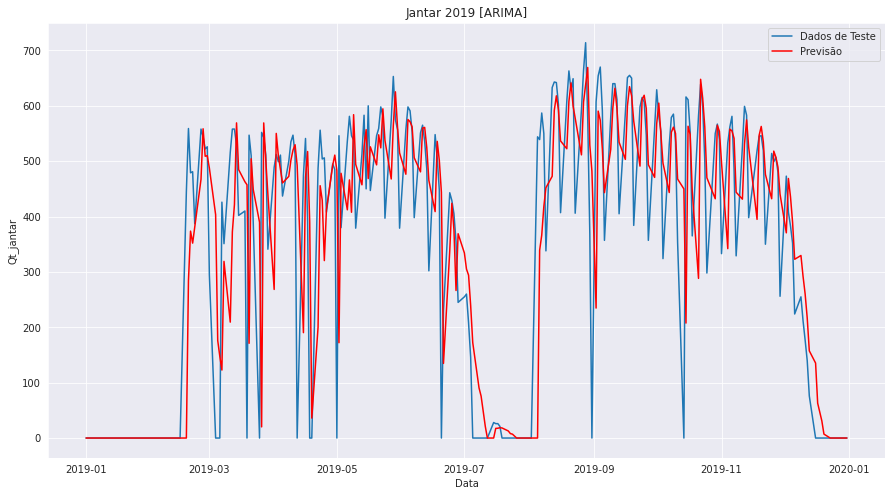

In [74]:
plt.title("Jantar 2019 [ARIMA]")
plt.xlabel("Data")
plt.ylabel("Qt_jantar")
plt.plot(jan_test.index, jan_test,label="Dados de Teste")
plt.plot(jan_test.index,predictions, color='red', label="Previsão")
plt.legend()
plt.show()

In [75]:
r2_score(jan_test,predictions)

0.6775459965567646

### SARIMA

<h2>No SARIMA foi utilizado o dataset original (com dias faltantes).</h2>

In [76]:
history = [x for x in alm_train]
predictions = list()
# walk-forward validation
for t in range(len(alm_test)):
	model = SARIMAX(history,seasonal_order=(3, 1, 0, 2))
	model_fit = model.fit()
	output = model_fit.forecast(typ='levels')
	pred = output[0]
	predictions.append(pred)
	true = alm_test[t]
	history.append(true)
predictions = [max(0,d)  for d in predictions] 

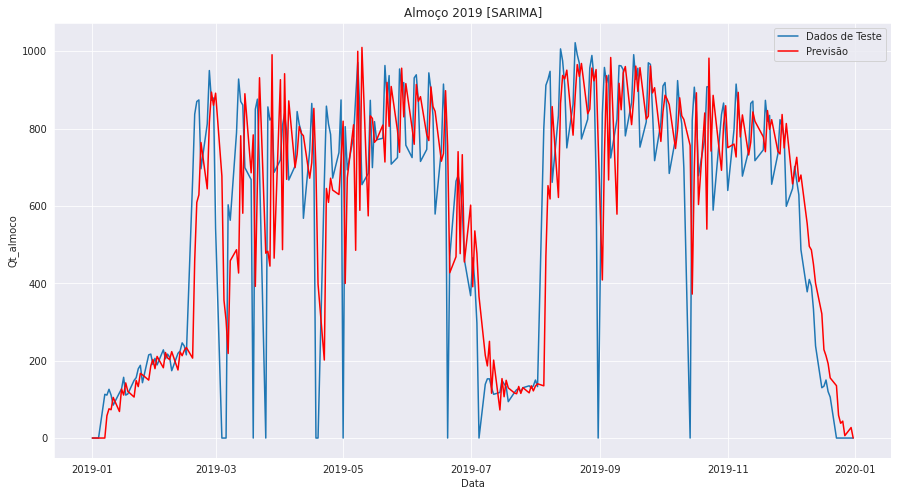

In [77]:
plt.title("Almoço 2019 [SARIMA]")
plt.xlabel("Data")
plt.ylabel("Qt_almoco")
plt.plot(alm_test.index, alm_test,label="Dados de Teste")
plt.plot(alm_test.index,predictions, color='red',label="Previsão")
plt.legend()
plt.show()

In [78]:
r2_score(alm_test,predictions)

0.6144770556672755

In [79]:
history = [x for x in jan_train]
predictions = list()
# walk-forward validation
for t in range(len(jan_test)):
	model = SARIMAX(history,seasonal_order=(3, 1, 0, 2))
	model_fit = model.fit()
	output = model_fit.forecast(typ='levels')
	pred = output[0]
	predictions.append(pred)
	true = jan_test[t]
	history.append(true)
predictions = [max(0,d)  for d in predictions] 

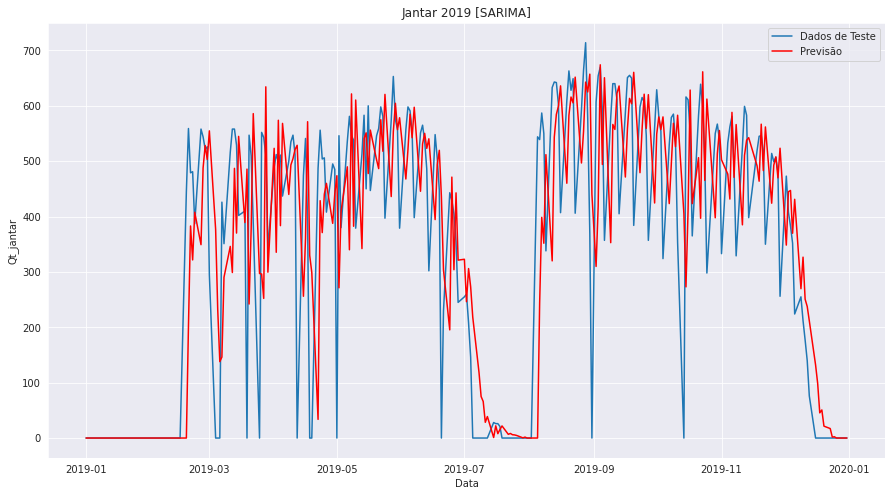

In [80]:
plt.title("Jantar 2019 [SARIMA]")
plt.xlabel("Data")
plt.ylabel("Qt_jantar")
plt.plot(jan_test.index, jan_test,label="Dados de Teste")
plt.plot(jan_test.index,predictions, color='red',label="Previsão")
plt.legend()
plt.show()

In [81]:
r2_score(jan_test,predictions)

0.5990611589719449